# Ex
### Exercise 11.1
- 6, 9, 15, 16

### Exercise 11.2
- 2, 8, 10, 11

# Com Ex
### Computer Exercise 10.1
- 1

### Computer Exercise 10.2
- 3, 18, 24

### Computer Exercise 10.3
- 1, 12, 17

### Computer Exercise 11.1
- 1

### Computer Exercise 11.2
- 3, 9

In [ ]:
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

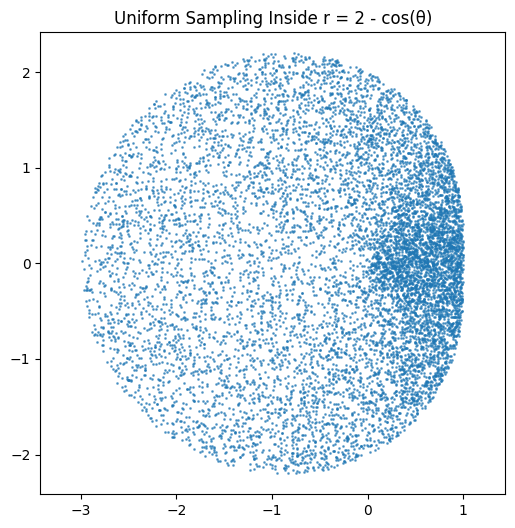

In [ ]:
# 10.1 - 1

def heart_random(n_samples=10000):
    theta = np.random.uniform(0, 2 * np.pi, n_samples)
    r_max = 2 - np.cos(theta)
    r = np.sqrt(np.random.uniform(0, 1, n_samples)) * r_max

    # 극좌표 -> 직교좌표 변환
    x = r * np.cos(theta)
    y = r * np.sin(theta)
    return x, y

# 예시: 시각화
n=10000
x, y = heart_random(n)
plt.figure(figsize=(6,6))
plt.scatter(x, y, s=1, alpha=0.6)
plt.axis('equal')
plt.title("Uniform Sampling Inside r = 2 - cos(θ)")
plt.show()


In [ ]:
# 10.2 - 3

def verify_pi_monte_carlo(n=10000):
    x = np.random.uniform(0, 2, n)
    y = np.random.uniform(0, 2, n)
    inside = y <= np.sqrt(4 - x**2)
    
    area = 2 * 2
    pi_estimate = area * np.mean(inside)
    
    return pi_estimate

print("Estimated π using Monte Carlo method:", verify_pi_monte_carlo(10000))

Estimated π using Monte Carlo method: 3.1356


In [49]:
# 10.2 - 18, 24

def monte_carlo_integrate(f, a, b, n=100000):
    x_samples = np.random.uniform(a, b, n)

    f_max = np.max(f(np.linspace(a, b, 1000)))

    y_samples = np.random.uniform(0, f_max, n)
    f_x = f(x_samples)

    inside = y_samples <= f_x
    ratio = np.mean(inside)

    area_rect = (b - a) * f_max
    estimated_integral = area_rect * ratio
    return estimated_integral

def comapre_integral(f, a, b, n=1000000):
    print("Monte Carlo Integration:", a, "to", b, ":", monte_carlo_integrate(f, a, b, n))
    print("Scipy Integration:", a, "to", b, ":", sp.integrate.quad(f, a, b)[0])
    print("Relative error:", abs(monte_carlo_integrate(f, a, b, n) - sp.integrate.quad(f, a, b)[0]) / sp.integrate.quad(f, a, b)[0])
    print("--------------------------------------------------")


print("Estimated integral of f(x) = x^2 from 1 to 2:")
comapre_integral(lambda x: x**2, 1, 2)
print("Estimated integral of f(x) = 2x^2-x+1 from 0 to 1:")
comapre_integral(lambda x: 2*x**2 - x + 1, 0, 1)
print("Estimated integral of f(x) = x^2 + sin(2x) from 0 to π:")
comapre_integral(lambda x: x**2 + np.sin(2*x), 0, np.pi)
print("Estimated integral of f(x) = e^(sin(x) + x^2)/ln(x) from 3.2 to 5.9:")
comapre_integral(lambda x: np.exp(np.sin(x) + x**2) / np.log(x), 3.2, 5.9, n = 100000000)

Estimated integral of f(x) = x^2 from 1 to 2:
Monte Carlo Integration: 1 to 2 : 2.33216
Scipy Integration: 1 to 2 : 2.3333333333333335
Relative error: 0.0003160000000000147
--------------------------------------------------
Estimated integral of f(x) = 2x^2-x+1 from 0 to 1:
Monte Carlo Integration: 0 to 1 : 1.168178
Scipy Integration: 0 to 1 : 1.1666666666666667
Relative error: 0.0014325714285714497
--------------------------------------------------
Estimated integral of f(x) = x^2 + sin(2x) from 0 to π:
Monte Carlo Integration: 0 to 3.141592653589793 : 10.298393730318102
Scipy Integration: 0 to 3.141592653589793 : 10.335425560099939
Relative error: 0.0006920000000001363
--------------------------------------------------
Estimated integral of f(x) = e^(sin(x) + x^2)/ln(x) from 3.2 to 5.9:
Monte Carlo Integration: 3.2 to 5.9 : 40932332210851.336
Scipy Integration: 3.2 to 5.9 : 40905568168874.13
Relative error: 0.0002095280725396266
--------------------------------------------------


In [ ]:
# 10.3 - 1

def monte_carlo_root_probability(n=1000000):
    a = np.random.uniform(-1, 1, n)
    b = np.random.uniform(-2, 2, n)

    deter = b**2 - 4*a
    prob = np.mean(deter >= 0)

    return prob

print("Estimated probability of having real roots:", monte_carlo_root_probability(1000000))

Estimated probability of having real roots: 0.666422


2차방정식 $ax^2 + bx + 1 = 0$이 실근을 갖기 위한 조건은 판별식 $D = b^2 - 4ac \geq 0$이므로, $b^2 - 4a \geq 0$인 (a, b)가 나올 확률을 구하는 문제이다.

전체 사각형 영역은 $A_{\text{total}} = 2 \cdot 4 = 8$ 이다.
실근 조건 영역은 다음과 같다.
$$
b^2 \geq 4a \Rightarrow a \leq \frac{b^2}{4}
$$

$$
A_{\text{real}} = 2 \int_0^2 \left( \frac{b^2}{4} + 1 \right) db = 2 \left[ \frac{1}{4} \cdot \frac{b^3}{3} + b \right]_0^2 = 2 \left( \frac{8}{12} + 2 \right) = 2 \cdot \left( \frac{2}{3} + 2 \right) = \frac{16}{3}
$$

결국 확률은:

$$
P = \frac{A_{\text{real}}}{A_{\text{total}}} = \frac{16/3}{8} = \frac{2}{3}
$$


In [ ]:
# 10.3 - 12

def sample_point_on_side(side):
    t = np.random.rand()
    if side == 0:
        return np.array([t, 0])
    elif side == 1:
        return np.array([1, t])
    elif side == 2:
        return np.array([1 - t, 1])
    elif side == 3: 
        return np.array([0, 1 - t])

def cosine_rule(p1, p2, p3):
    v1 = p1 - p2
    v2 = p3 - p2
    return np.dot(v1, v2) / (np.linalg.norm(v1) * np.linalg.norm(v2))

def check_obtuse(p1, p2, p3):
    cosA = cosine_rule(p2, p1, p3)
    cosB = cosine_rule(p1, p2, p3)
    cosC = cosine_rule(p1, p3, p2)
    return cosA < 0 or cosB < 0 or cosC < 0

def estimate_obtuse_probability(n_samples=100000):
    cnt = 0
    for _ in range(n_samples):
        sides = np.random.choice(4, size=3, replace=False)
        pts = [sample_point_on_side(s) for s in sides]
        if check_obtuse(*pts):
            cnt += 1
    return cnt / n_samples

estimated_prob = estimate_obtuse_probability()
print(f"Estimated probability of obtuse triangle: {estimated_prob:.5f}")


Estimated probability of obtuse triangle: 0.52696


In [57]:
# 10.3 - 17

def estimate_random_walk(n_steps=50, n=100000, threshold=20):
    dir = np.array([
        [1, 0],
        [-1, 0],
        [0, 1],
        [0, -1]
    ])
    probs = [1/6, 1/3, 1/4, 1/4] 

    count_far = 0

    for _ in range(n):
        pos = np.array([0, 0])
        steps = np.random.choice(4, size=n_steps, p=probs)
        for step in steps:
            pos += dir[step]
        dist = np.linalg.norm(pos)
        if dist >= threshold:
            count_far += 1

    return count_far / n

print(f"Estimated probability of being ≥20 units from origin after 50 steps: {estimate_random_walk():.5f}")

Estimated probability of being ≥20 units from origin after 50 steps: 0.01360


C:\Users\hamas\AppData\Local\Temp\ipykernel_332048\3617146165.py:25: RuntimeWarning: invalid value encountered in log
  term2 = np.log(c1) - 2 * np.log(np.cos(np.sqrt(0.5 * c1) + c2))
C:\Users\hamas\AppData\Local\Temp\ipykernel_332048\3617146165.py:37: RuntimeWarning: invalid value encountered in log
  x_exact = lambda t: np.log(c1_opt) - 2 * np.log(np.cos(np.sqrt(0.5 * c1_opt) * t + c2_opt))


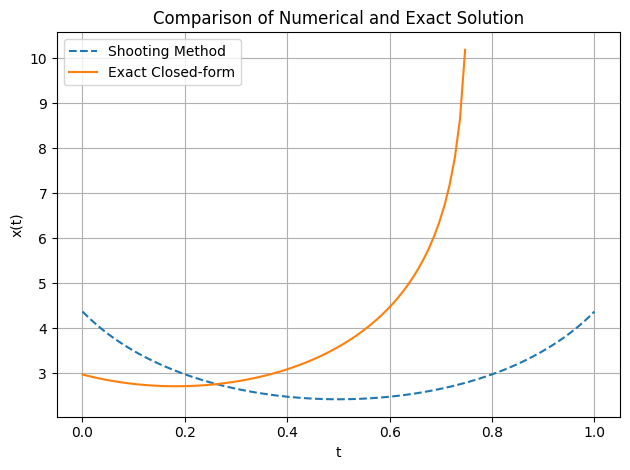

Initial slope z* ≈ -11.629832398162762
Optimized c1 ≈ 15.0
Optimized c2 ≈ -0.5


In [ ]:
# 11.1 - 1

a = 0
b = np.pi
N = 100
h = (b - a) / N
t = np.linspace(a, b, N+1)

x0 = 0
xN = np.pi

A = np.zeros((N-1, N-1))
b_vec = np.zeros(N-1)

for i in range(1, N):
    ti = t[i]
    
    A[i-1, i-1] = -2/h**2 - 1
    if i > 1:
        A[i-1, i-2] = 1/h**2 - ti/(2*h)
    if i < N-1:
        A[i-1, i] = 1/h**2 + ti/(2*h)

    b_vec[i-1] = -(-2 * ti * np.cos(ti) + ti) 

b_vec[0] -= A[0,0-1] * x0 if N > 1 else 0
b_vec[-1] -= A[-1,-1+1] * xN if N > 1 else 0

x_internal = np.linalg.solve(A, b_vec)

x_numeric = np.concatenate(([x0], x_internal, [xN]))
x_exact = t + 2 * np.sin(t)

# 결과 시각화
plt.plot(t, x_numeric, label='Numerical (FDM)', marker='o', markersize=3, linewidth=1)
plt.plot(t, x_exact, label='Exact: x(t) = t + 2sin(t)', linestyle='--')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Boundary Value Problem Solution')
plt.legend()
plt.grid(True)
plt.show()


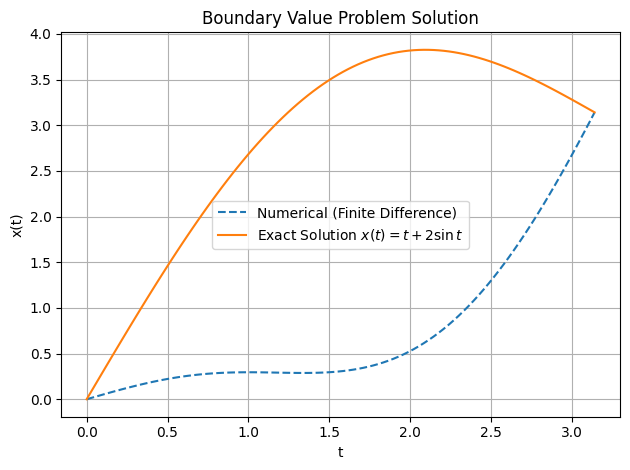

Maximum absolute error: 3.364070


In [69]:
n = 100
a, b = 0, np.pi
h = (b - a) / (n + 1)

t = np.linspace(a + h, b - h, n)

A = np.zeros((n, n))
rhs = np.zeros(n)

for i in range(n):
    ti = t[i]

    A[i, i] = -2 / h**2 + ti / (2 * h) + 1

    if i > 0:
        A[i, i - 1] = 1 / h**2 - ti / (2 * h)
    else:
        rhs[i] -= (1 / h**2 - ti / (2 * h)) * 0

    if i < n - 1:
        A[i, i + 1] = 1 / h**2
    else:
        rhs[i] -= (1 / h**2) * np.pi

    rhs[i] += -2 * ti * np.cos(ti) + ti

x_numeric = np.linalg.solve(A, rhs)

t_full = np.concatenate(([a], t, [b]))
x_numeric_full = np.concatenate(([0], x_numeric, [np.pi]))
x_exact_full = t_full + 2 * np.sin(t_full)

# 시각
plt.plot(t_full, x_numeric_full, '--', label='Numerical (Finite Difference)')
plt.plot(t_full, x_exact_full, '-', label='Exact Solution $x(t) = t + 2\\sin t$')
plt.xlabel('t')
plt.ylabel('x(t)')
plt.title('Boundary Value Problem Solution')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

max_error = np.max(np.abs(x_numeric_full - x_exact_full))
print(f"Maximum absolute error: {max_error:.6f}")

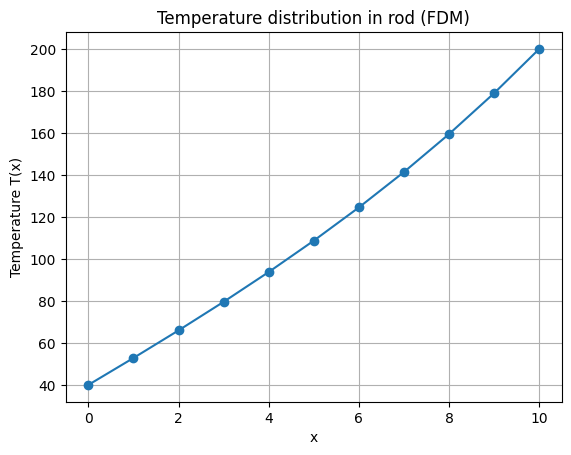

In [68]:
# 11.2 - 9

L = 10
N = 10
h = L / N
alpha = 1e-2
Ta = 20
T1 = 40
T2 = 200

A = np.zeros((N-1, N-1))
b = np.zeros(N-1)

main_diag = 2 + alpha * h**2
off_diag = -1
rhs_const = alpha * h**2 * Ta

for i in range(N-1):
    A[i][i] = main_diag
    if i > 0:
        A[i][i-1] = off_diag
    if i < N-2:
        A[i][i+1] = off_diag

b[:] = rhs_const
b[0] += T1
b[-1] += T2

T_internal = np.linalg.solve(A, b)

T = np.concatenate(([T1], T_internal, [T2]))
x = np.linspace(0, L, N+1)

plt.plot(x, T, marker='o')
plt.xlabel('x')
plt.ylabel('Temperature T(x)')
plt.title('Temperature distribution in rod (FDM)')
plt.grid(True)
plt.show()